Importing the necessary libraries

In [1]:
# Linear algebra
import numpy as np 

# Data processing
import pandas as pd 

# Visualizations
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

# Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

Load Data dan Menampilkan Data

In [2]:
df= pd.read_csv('genre-music.csv')
df.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,class_label
0,0.430894,0.196222,1946.565652,1979.909934,3955.867746,0.097454,-67.770980,111.704184,-34.646105,61.334896,...,12.295832,-12.477988,1.681278,-5.142068,4.644002,-6.919217,1.040718,-4.736871,-0.660037,blues
1,0.338896,0.251350,2141.461656,2168.015560,4627.997015,0.105151,-29.362093,108.667950,-25.573165,38.429470,...,5.456504,-7.687713,7.410600,-11.319177,7.229288,-9.466552,1.930059,-6.328476,-1.304812,blues
2,0.263016,0.170081,1379.081742,2004.000850,3015.831764,0.039376,-206.987590,117.781468,23.256245,28.294068,...,-8.015467,-17.616342,-8.138554,-8.646157,-15.538988,-15.331506,-9.664872,-10.103310,-17.835100,blues
3,0.307921,0.131785,1451.754147,1577.369917,2955.348796,0.061435,-179.395447,136.459244,-26.656359,39.988027,...,-6.954827,-3.544535,-8.051242,-8.959537,-8.424337,-10.558885,-10.788159,-4.693749,-8.638613,blues
4,0.332480,0.117413,2553.232415,2280.128669,5148.102203,0.146852,-85.150250,88.806722,-16.322611,59.224516,...,8.478453,-19.590225,6.413210,-13.779667,6.112037,-13.154644,3.933456,-7.615454,3.752626,blues


In [3]:
# Melihat jumlah baris dan kolom
df.shape

(1000, 27)

In [4]:
# Tipe data setiap kolom
df.dtypes

chroma_stft           float64
rmse                  float64
spectral_centroid     float64
spectral_bandwidth    float64
rolloff               float64
zero_crossing_rate    float64
mfcc1                 float64
mfcc2                 float64
mfcc3                 float64
mfcc4                 float64
mfcc5                 float64
mfcc6                 float64
mfcc7                 float64
mfcc8                 float64
mfcc9                 float64
mfcc10                float64
mfcc11                float64
mfcc12                float64
mfcc13                float64
mfcc14                float64
mfcc15                float64
mfcc16                float64
mfcc17                float64
mfcc18                float64
mfcc19                float64
mfcc20                float64
class_label            object
dtype: object

MISSING VALUE (Data Cleaning = Mengganti nilai yang null dengan nilai rata-rata yang paling sering muncul di komlom tersebut)

In [5]:
# Presentase missing value

total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
class_label,0,0.0
mfcc7,0,0.0
rmse,0,0.0
spectral_centroid,0,0.0
spectral_bandwidth,0,0.0


In [6]:
#Mean, Median, Minimum , Maximum 

df.describe()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.378656,0.130929,2201.834226,2242.559613,4571.702159,0.103637,-144.479173,99.552199,-8.921949,36.293063,...,-6.021121,4.471604,-4.797232,1.781547,-3.870275,1.147988,-3.967431,0.507303,-2.328779,-1.094875
std,0.081689,0.065685,715.961347,526.337663,1574.770035,0.041834,100.235661,31.331904,21.695015,16.666987,...,6.819018,6.717312,6.170919,5.009489,4.874423,4.579110,4.550650,3.869088,3.755574,3.837561
min,0.171782,0.005276,569.930721,897.994319,749.062137,0.021701,-552.064063,-1.527148,-89.901142,-18.768461,...,-28.052265,-15.805227,-27.542309,-12.598773,-17.545474,-15.693589,-17.227765,-11.975698,-18.504188,-19.935203
25%,0.319641,0.086625,1627.793931,1907.136505,3380.956639,0.070281,-200.695133,76.811480,-24.223791,24.107395,...,-10.966826,-0.551576,-9.363372,-1.640080,-7.164838,-1.857098,-7.194297,-2.003979,-4.670281,-3.368000
50%,0.383075,0.122448,2209.468780,2221.408983,4658.671829,0.099539,-120.206072,98.452551,-10.716073,36.957074,...,-5.920161,3.891842,-4.199810,1.879424,-3.614473,1.211944,-4.059109,0.669788,-2.391261,-1.155198
75%,0.435974,0.175793,2691.969702,2578.474352,5534.197785,0.132007,-73.895019,119.893638,5.505793,48.212826,...,-1.004241,9.706133,-0.161017,5.155264,-0.323536,4.350694,-0.842968,3.112518,0.149070,1.303739
max,0.663573,0.398012,4434.439444,3509.578677,8676.405868,0.274829,42.034587,193.096518,56.666090,80.691273,...,17.421038,23.037571,13.054333,18.161663,12.357588,13.468803,11.489994,15.379257,14.686910,15.368966


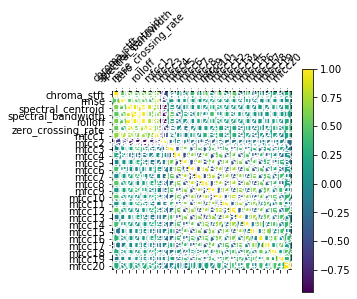

In [7]:
# Korelasi

plt.matshow(df.corr())
plt.colorbar()
plt.xticks(np.arange(len(df.corr().columns)), df.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(df.corr().columns)), df.corr().columns.values) 
for (i, j), corr in np.ndenumerate(df.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=14)


In [8]:
X = df.drop(['class_label'], axis=1)
Y = df['class_label']

In [9]:
X.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.430894,0.196222,1946.565652,1979.909934,3955.867746,0.097454,-67.770980,111.704184,-34.646105,61.334896,...,-6.335245,12.295832,-12.477988,1.681278,-5.142068,4.644002,-6.919217,1.040718,-4.736871,-0.660037
1,0.338896,0.251350,2141.461656,2168.015560,4627.997015,0.105151,-29.362093,108.667950,-25.573165,38.429470,...,-12.078506,5.456504,-7.687713,7.410600,-11.319177,7.229288,-9.466552,1.930059,-6.328476,-1.304812
2,0.263016,0.170081,1379.081742,2004.000850,3015.831764,0.039376,-206.987590,117.781468,23.256245,28.294068,...,-17.789054,-8.015467,-17.616342,-8.138554,-8.646157,-15.538988,-15.331506,-9.664872,-10.103310,-17.835100
3,0.307921,0.131785,1451.754147,1577.369917,2955.348796,0.061435,-179.395447,136.459244,-26.656359,39.988027,...,-8.414554,-6.954827,-3.544535,-8.051242,-8.959537,-8.424337,-10.558885,-10.788159,-4.693749,-8.638613
4,0.332480,0.117413,2553.232415,2280.128669,5148.102203,0.146852,-85.150250,88.806722,-16.322611,59.224516,...,-14.804457,8.478453,-19.590225,6.413210,-13.779667,6.112037,-13.154644,3.933456,-7.615454,3.752626


In [10]:
#Splitting data ke test data dan training data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(Y_train.shape)

(700, 26)
(700,)


In [11]:
from sklearn import preprocessing

categorical = ['chroma_stft','rmse','spectral_centroid','spectral_bandwidth','rolloff','zero_crossing_rate','mfcc1','mfcc2','mfcc3','mfcc4',
'mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13','mfcc14','mfcc15','mfcc16','mfcc17','mfcc18','mfcc19','mfcc20']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [12]:
# Menggunakan StandardScalar untuk normalisasi data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [13]:
X_train.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,-1.676849,-1.669475,-1.491362,-1.424632,-1.485495,-1.107179,-1.641807,1.280801,-0.550065,-0.056347,...,0.313721,0.013424,1.646941,0.512170,1.678527,1.397610,1.500014,-0.845445,0.790485,1.223183
1,-0.050515,0.409516,-1.606101,-1.354910,-1.550301,-1.720664,-0.757684,1.500308,0.544564,0.267035,...,0.159323,0.048337,0.681906,-0.276233,-1.121723,-1.619009,-1.122348,-1.514255,-0.138495,0.499722
2,0.787596,1.391678,0.509084,0.547482,0.603251,0.079888,1.035537,-0.440332,0.002225,0.446139,...,-0.224184,-0.171118,-0.969598,0.162877,-0.882556,0.594840,1.385565,1.545300,0.899777,-0.777560
3,0.493260,1.336836,0.294572,1.169993,0.742833,-0.229348,1.255319,0.233155,1.405340,-1.553853,...,0.876530,-1.497820,0.472981,-1.234292,-0.219863,-0.372472,0.415242,-0.036884,1.441268,-0.962167
4,1.061978,1.212197,0.309538,0.408040,0.398863,0.064925,-0.218219,-1.019032,0.380369,0.242160,...,0.473101,1.190498,0.587392,0.996189,1.205175,0.146087,0.873035,0.442263,-0.719729,0.809064


In [14]:
# Decision Tree 

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [15]:
# Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [16]:
# KNN 2
classifier1 = KNeighborsClassifier(n_neighbors=2)
classifier1.fit(X_train, Y_train)
Y_pred = classifier1.predict(X_test)
acc_knn2 = round(classifier1.score(X_train, Y_train) * 100, 2)


In [17]:
# KNN 3
classifier2 = KNeighborsClassifier(n_neighbors=3)
classifier2.fit(X_train, Y_train)
Y_pred = classifier2.predict(X_test)
acc_knn3 = round(classifier2.score(X_train, Y_train) * 100, 2)


In [18]:
# KNN 4
classifier3 = KNeighborsClassifier(n_neighbors=4)
classifier3.fit(X_train, Y_train)
Y_pred = classifier3.predict(X_test)
acc_knn4 = round(classifier3.score(X_train, Y_train) * 100, 2)


In [19]:
# KNN 5
classifier4 = KNeighborsClassifier(n_neighbors=5)
classifier4.fit(X_train, Y_train)
Y_pred = classifier4.predict(X_test)
acc_knn5 = round(classifier4.score(X_train, Y_train) * 100, 2)


In [20]:
# SVM

svm1 = svm.SVC()
svm1.fit(X_train, Y_train)
Y_pred = svm1.predict(X_test)
acc_svm = round(svm1.score(X_train, Y_train) * 100, 2)

In [21]:
# Random Forest

random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)


In [22]:
# Akurasi

results = pd.DataFrame({
    'Model': ['Decision Tree','Naive Bayes', 'KNN K=2','KNN K=3','KNN K=4','KNN K=5','SVM','Random Forest'],
    'Score': [acc_decision_tree,acc_gaussian,acc_knn2, acc_knn3, acc_knn4, acc_knn5, acc_svm, acc_random_forest ]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
100.00,Decision Tree
100.00,Random Forest
79.57,SVM
79.00,KNN K=2
77.71,KNN K=3
77.29,KNN K=4
75.29,KNN K=5
43.71,Naive Bayes
